In [4]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Lecture 12: Ideal fluid flow

Understanding branch cuts and Cauchy transforms allows us to systematically solve equations involving Laplace equation. A classic example is Ideal fluid flow. Consider the case of uniform flow with angle $\theta$ around an infinitesimally small plate on $[-1,1]$. We can model this as
$$
\begin{align*}
v(x,y) &\sim y \cos \theta - x \sin \theta  \\
v_{xx} + v_{yy} &= 0 \\
v(x,0) & = 0 \qqfor -1 < x <1
\end{align*}
$$
Using the techniques we developed in the last few lectures, we obtain a nice, simple, closed form expression as the imaginary part of an analytic function:

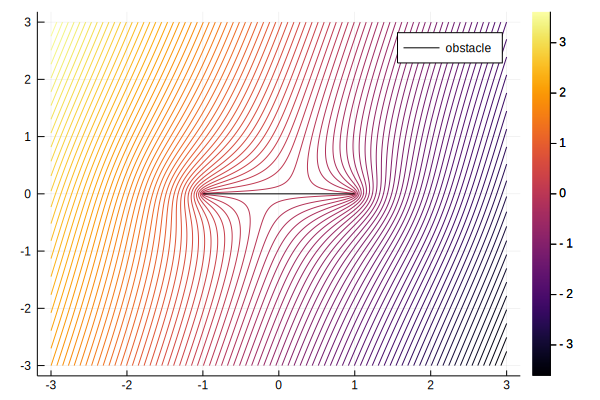

In [6]:
μ = z -> -im*(sqrt(z-1)sqrt(z+1) - z)
Φ = (θ,z) -> exp(-im*θ)*z + sin(θ)μ(z)
u = (θ,x,y) -> imag(Φ(θ, x + im*y))

xx = yy = range(-3; stop=3 , length=500)
contour(xx, yy, u.(1.3,xx',yy); nlevels = 100)
plot!(Segment(-1.,1.); color=:black, label="obstacle")

We divide this task into stages:

1. Rephrasing as a complex-analytical problem: $v(x,y)$ to $\phi(z)$
2. Reduction to inverting a Hilbert transform: $\phi(z)$ to $w(x)$
3. Calculating the inverse Hilbert transform: Finding $w(x)$
4. Calculating its Cauchy transform: $w(x)$ to $\phi(z)$



### 1. Real and imaginary parts of analytic functions satisfy Laplace's equation

The real and imaginary parts of an analytic function satisfy Laplace's equation: that is  if $\phi(z) = \phi(x + \I y) = u(x,y) + \I v(x,y)$ where $u$ and $v$ are the real/imaginary parts, then 
$$
 u_{xx} + u_{yy}= 0 \\
 v_{xx} + v_{yy} = 0
$$
To see this, note that the complex-derivative of $\phi(z)$ can be written in terms of two different partial derivatives:
$$
    \phi'(z) = \lim_{h \rightarrow 0} {\phi(z+h) - \phi(z) \over h} = \lim_{h \rightarrow 0} {u(x+h,y)-u(x,y) + \I (v(x+h,y)-v(x,y)) \over h} = u_x + \I v_x \\
    \phi'(z) = \lim_{h \rightarrow 0} {\phi(z+\I h) - \phi(z) \over \I h} = \lim_{h \rightarrow 0} {u(x,y+h)-u(x,y) + \I (v(x,y+h)-v(x,y)) \over \I h} = - \I u_y + v_y
$$
Taking a second derivative we get two equations:
$$
    \phi'(z) = u_{xx} + \I v_{xx} = -u_{xx} -\I v_{yy} 
$$
which implies $u_{xx} + u_{yy} = 0$ and $v_{xx} + v_{yy} = 0$.


### 2. Reduce PDE to the Hilbert transform of an unknown function

Therefore we can rewrite the ideal fluid flow equation as a problem of calculating $\phi(z) = u(x,y) + \I v(x,y)$ whose imaginary part is the solution too the ideal fluid flow PDE (we don't use the real part $u$). That is, we want to find analytic $\phi(z)$ that satisfies
\begin{align*}
    \phi(z) &\sim e^{-\I \theta} z \\
    \Im \phi(x) &= 0  \qquad\hbox{for}\qquad -1 < x < 1
\end{align*}


Write
$$
\phi(z) = e^{-\I \theta} z + c + \CC_{[-1,1]} w(z)
$$
for an as-of-yet unknown function $w$ and $C$ an unknown constant, we have that
$$
0 = \Im \phi(x) = -x \sin \theta + \Im c + \Im \CC_{[-1,1]}^+ w(x) = -x \sin \theta + \Im c -{1 \over 2} \HH w(x)
$$
In this example, we can take $c = 0$. Therefore, we want to solve
$$
\HH w(x) = - 2 x  \sin \theta
$$
for $w$.  


### 3. Calculating the inverse Hilberrt transform

We now plug the problem into the inverse Hilbert transform formula:

$$
    w(x) = {- 1\over \sqrt{1-x^2}} {\cal H}[f \sqrt{1-\diamond^2}](x)  + {D \over \sqrt{1-x^2}}
$$

where $f(x) = -2 x \sin \theta$. Now that

Similar to last lecture, we find
$$
{\cal C}[\diamond \sqrt{1-\diamond^2}](z) = {z \sqrt{z-1} \sqrt{z+1} - z^2 + 1/2 \over 2 \I }
$$
and therefore
$$
{\cal H}[\diamond \sqrt{1-\diamond^2}](x) = \I({\cal C}^+ + {\cal C}^-)[\diamond \sqrt{1-\diamond^2}](x) = {1 \over 2} - x^2
$$
Thus (relabeling $D$) we have
$$
w(x) = 2\sin \theta {D-x^2  \over \sqrt{1-x^2}} 
$$

_Demonstration_ Here we see that this gives us the right Hilbert transform:

In [17]:
D = randn()
θ = 0.1
x = Fun()
w = 2sin(θ) * (D-x^2)/sqrt(1-x^2)
hilbert(w,0.2)- (-2sin(θ)*0.2)

0.0

$D$ is arbitrary, but from physical principles we know that we don't want the solution to blow up. If $w$ blows up then so does its Cauchy transform. Therefore, we choose $D = -1$ so that

$$
w(x) = 2 \sin \theta \sqrt{1-x^2}
$$

### 4. Calculating its Cauchy transform

Now recall
$$
\CC\left[{\sqrt{1-\diamond^2}}\right](z) = {\sqrt{z-1} \sqrt{z+1} -z \over 2 \I}
$$

Therefore, $w(x) = 2 \sin \theta \sqrt{1-x^2}$,  implies
$$
\CC w(z) = - \I \sin \theta (\sqrt{z-1} \sqrt{z+1} -z)
$$
which means
$$
\phi(z) = e^{-\I \theta} z - \I \sin \theta (\sqrt{z-1} \sqrt{z+1} -z).
$$


## Numerical example of two intervals

We note that for obstacles on the real line, represented by a contour $\Gamma$, the problem of ideal fluid flow around $\gamma$ is still reducible to solving the singular integral equation
$$
\HH_\Gamma f(x) = - 2 x  \sin \theta
$$
Even when not solvable exactly, one can solve it numerically:

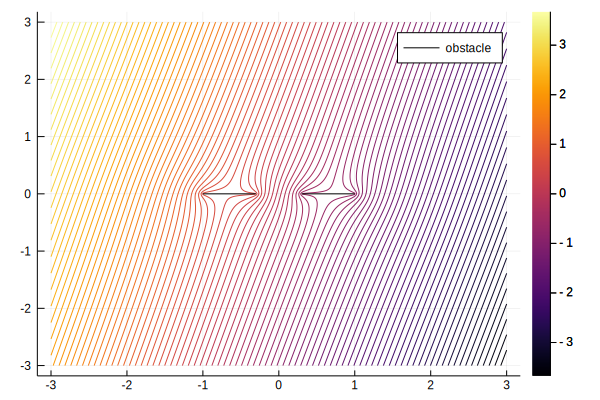

In [3]:
a = 0.3
θ = 1.3
Γ = Segment(-1,-a) ∪ Segment(a, 1)

x = Fun(Γ)
sp = PiecewiseSpace(JacobiWeight.(0.5,0.5,components(Γ))...)
H = Hilbert(sp)


o₁ = Fun(x -> -1 ≤ x ≤ -a ? 1 : 0, Γ )
o₂ = Fun(x -> a ≤ x ≤ 1 ? 1 : 0, Γ )

a, b, f = [o₁ o₂ H] \ [-2x*sin(θ)]


Φ = (θ,z) -> exp(-im*θ)*z + cauchy(f, z)
v = (θ,x,y) -> imag(Φ(θ, x + im*y))

xx = yy = range(-3.; stop=3., length=500)
contour(xx, yy, v.(θ, xx',yy); nlevels = 100)
plot!(Γ; color=:black, label="obstacle")